# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [16]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns

In [17]:
# Read Dataset

data = pd.read_csv('product_sales.csv')
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Data cleaning and Handling missing data 

The revenue coulmn is the only column with missing values, I replaced the missing data in the revenue column with the median value of the column because the data is positively skewed as can be seen.

In [18]:
# Check for skewness 
skewness = data['revenue'].skew()
print(f'Skewness of the data: {skewness}')

Skewness of the data: 1.0824031729892225


In [19]:
# Check the number of missing values before replacement
missing_before = data['revenue'].isnull().sum()
print(f'Missing values before replacement: {missing_before}')

# Calculate the median of the column, ignoring NaN values
median_value = data['revenue'].median()
print(f'Median value: {median_value}')

# Replace NaN values with the median
data['revenue'] = data['revenue'].fillna(median_value)

# Check the number of missing values after replacement
missing_after = data['revenue'].isnull().sum()
print(f'Missing values after replacement: {missing_after}')

Missing values before replacement: 1074
Median value: 89.5
Missing values after replacement: 0


## How many customers were there for each approach?

To count the number of customers who were there for each approach, I grouped the data by sales method and counted the unique number of customers for each method. They were spelling and capitalization errors in the sales method column which have been handled.

In [20]:
# update the sales method column & make it uniform
data['sales_method'].replace('em + call', 'Email + Call', inplace=True)
data['sales_method'].replace('email', 'Email', inplace=True)
# count the unique number of customers per sales method
customers_per_method = data.groupby('sales_method'
                                   )['customer_id'].nunique()
print('Unique customers count per sales method:')
print(customers_per_method)

Unique customers count per sales method:
sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64


## What does the spread of the revenue look like overall? And for each method?

To understand the spread of revenue overall and for each sales method, I used several descriptive statistics and visualizations.

In [21]:
# Descriptive Statistics for overall revenue
overall_stats = data['revenue'].describe().round(2)
print('Overall Revenue Descriptive Statistics:')
print(overall_stats)

Overall Revenue Descriptive Statistics:
count    15000.00
mean        93.62
std         45.72
min         32.54
25%         53.04
50%         89.50
75%        106.07
max        238.32
Name: revenue, dtype: float64


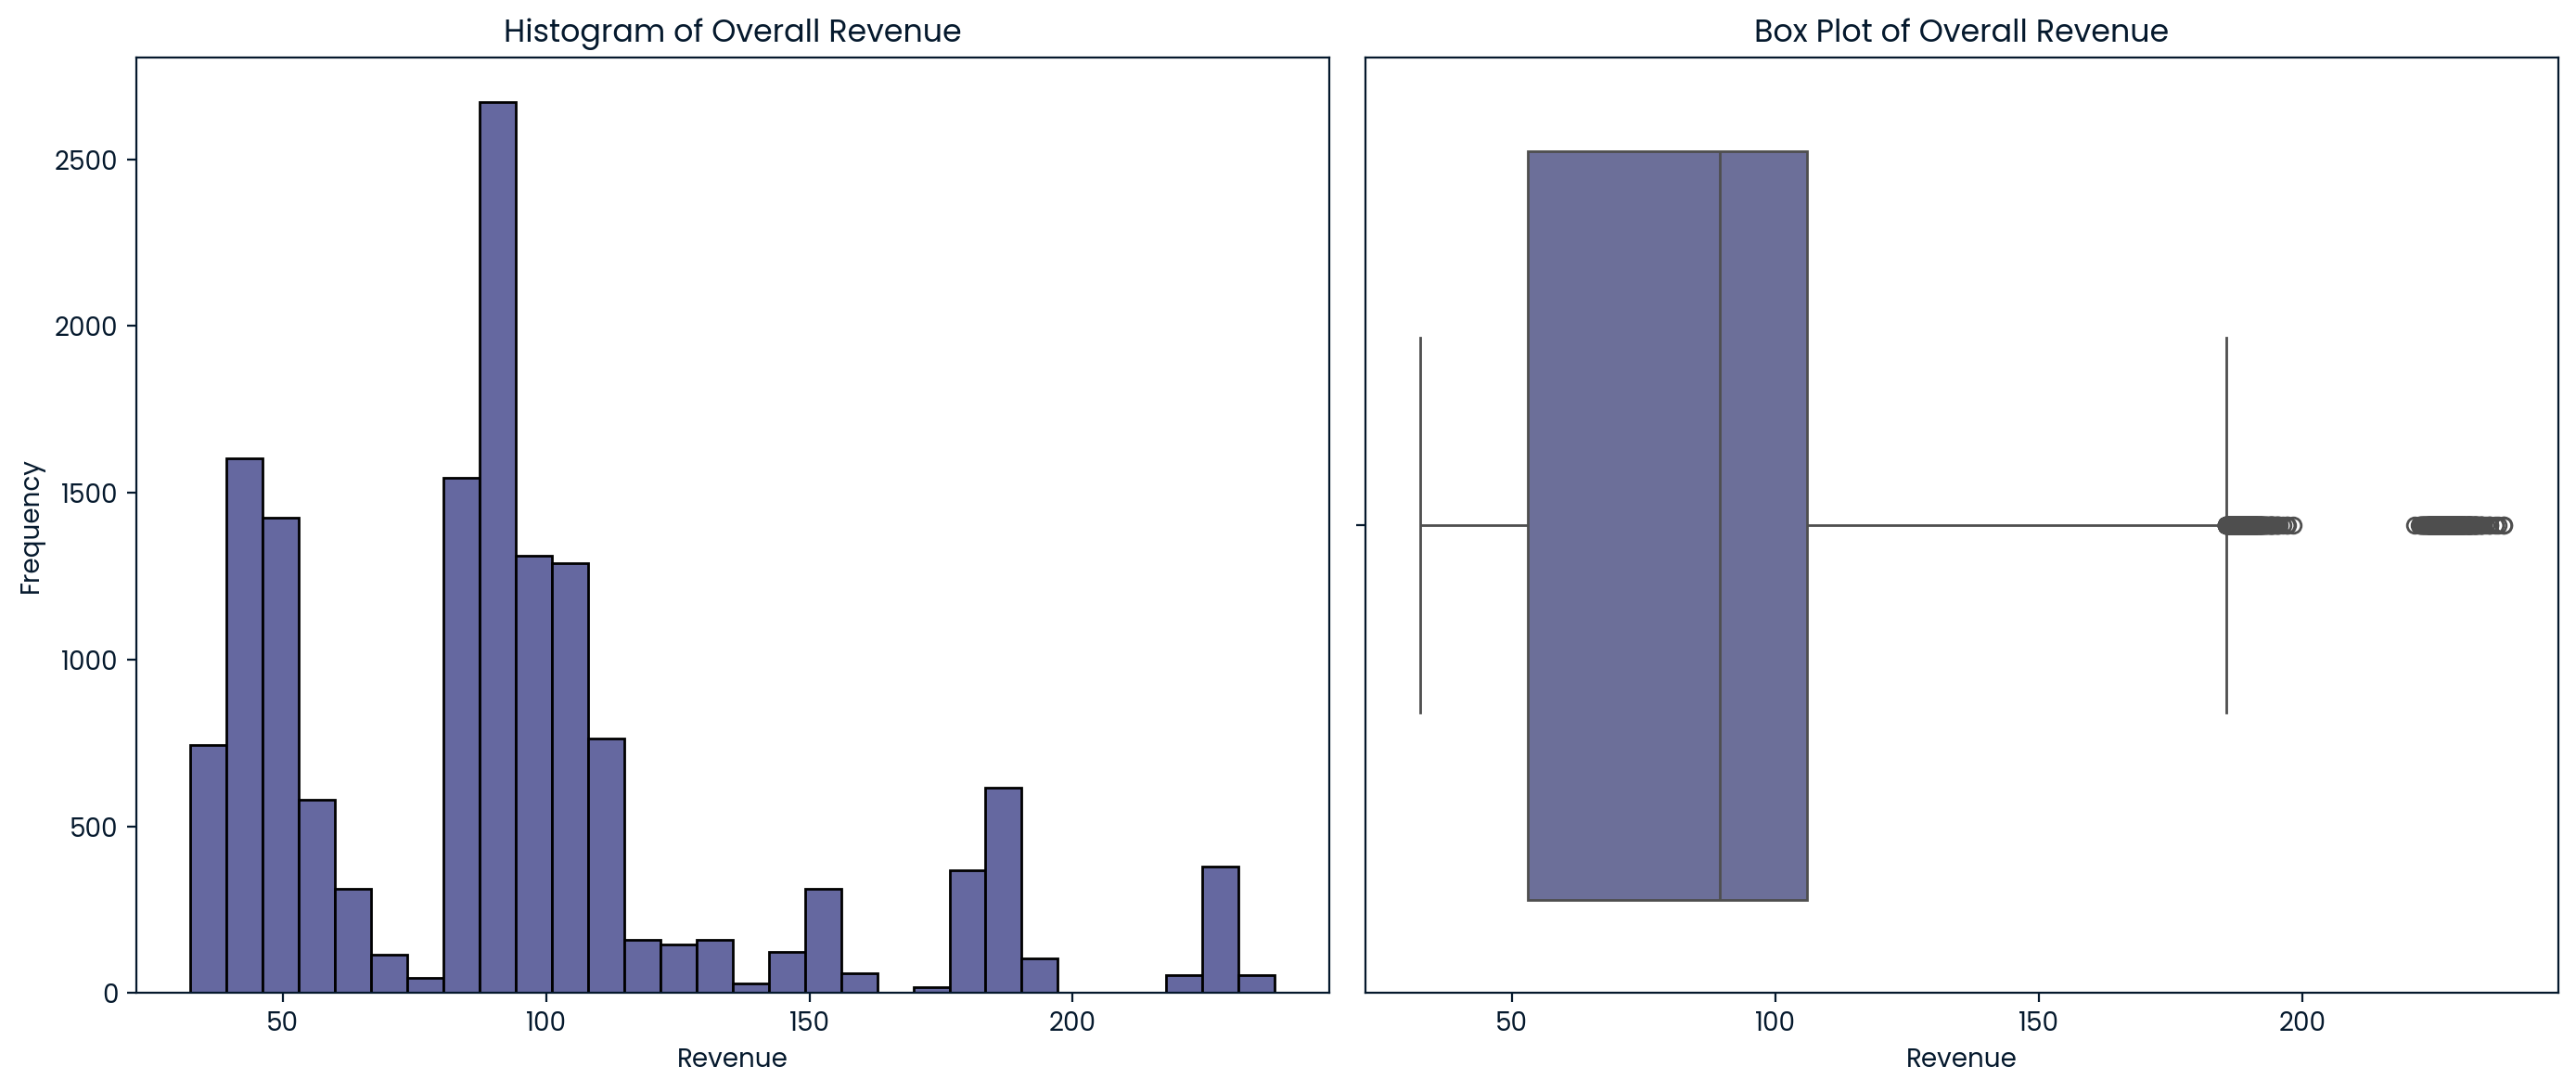

In [22]:
# Plot Histogram
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data['revenue'], bins=30, edgecolor='black')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Revenue')

# Plot Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['revenue'])
plt.xlabel('Revenue')
plt.title('Box Plot of Overall Revenue')

plt.tight_layout()
plt.show()

To understand the revenue spread for each sales method:
- Descriptive Statistics: Calculate for each method.
- Visualization: Create separate histograms or box plots for each sales method.

In [23]:
# Descriptive Statistics for revenue by sales method
stats_by_method = data.groupby('sales_method'
                              )['revenue'].describe().round(1)
print("Revenue Descriptive Statistics by Sales Method:")
print(stats_by_method)


Revenue Descriptive Statistics by Sales Method:
               count   mean   std   min    25%    50%    75%    max
sales_method                                                       
Call          4962.0   49.1  11.5  32.5   41.6   49.9   53.0   89.5
Email         7466.0   96.6  11.0  78.8   88.4   94.3  104.5  149.0
Email + Call  2572.0  170.9  42.1  89.5  149.8  182.1  189.5  238.3


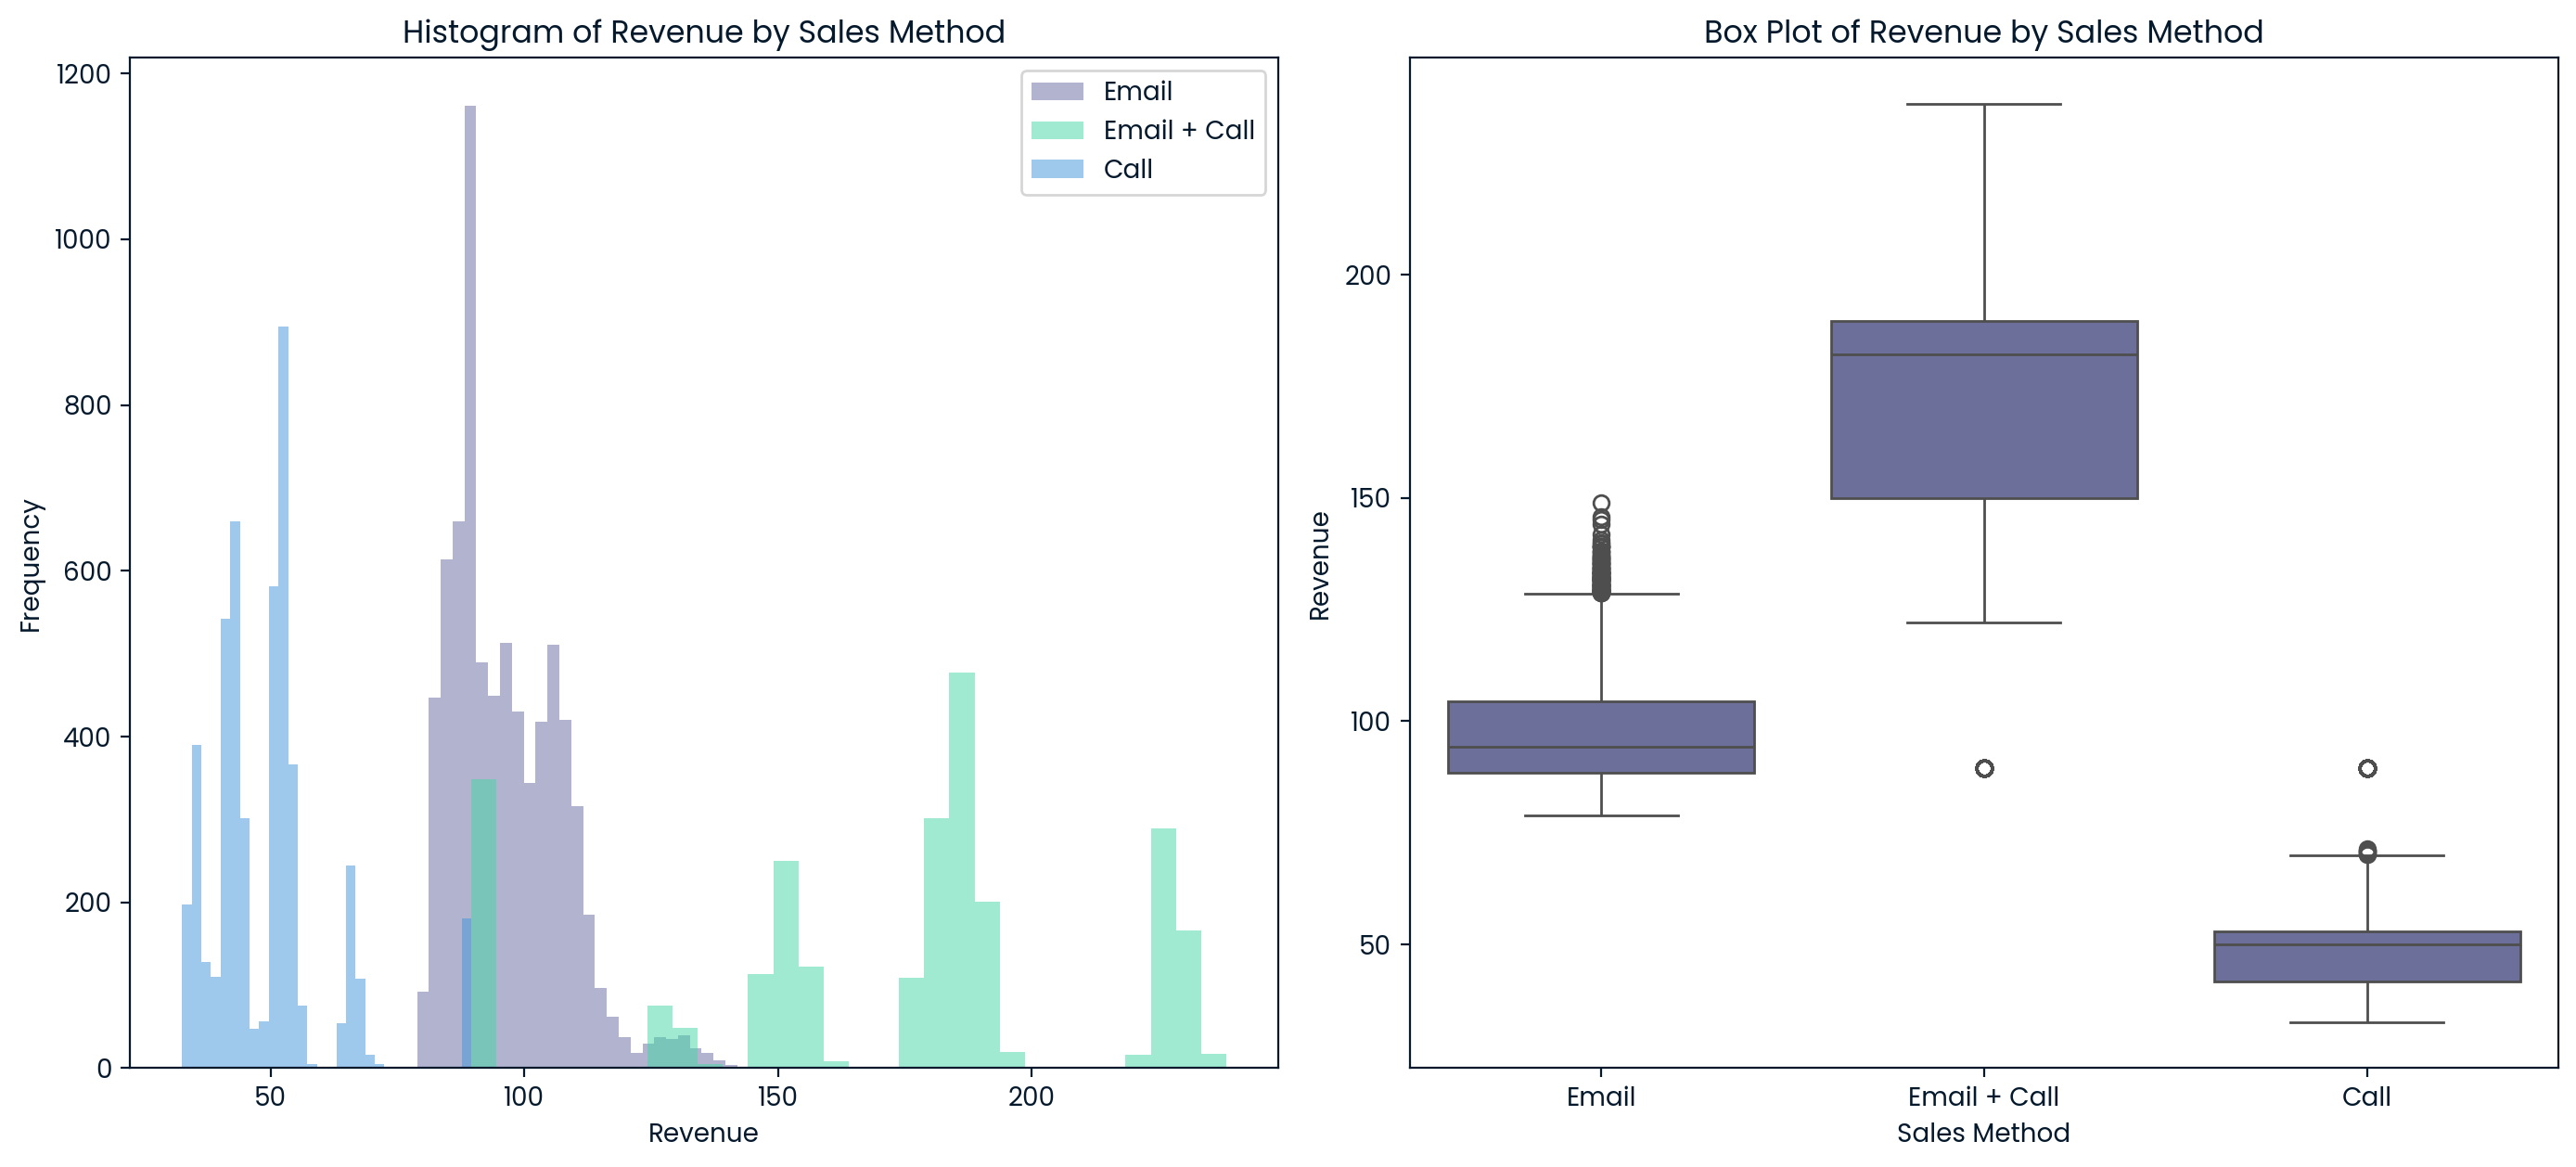

In [24]:
# Plot Histogram and Box Plot for Each Sales Method
plt.figure(figsize=(14, 12))

# Histograms
plt.subplot(2, 2, 1)
for method in data['sales_method'].unique():
    subset = data[data['sales_method'] == method]
    plt.hist(subset['revenue'], bins=30, alpha=0.5, label=method)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue by Sales Method')
plt.legend()

# Box Plots
plt.subplot(2, 2, 2)
sns.boxplot(x='sales_method', y='revenue', data=data)
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Box Plot of Revenue by Sales Method')

plt.tight_layout()
plt.show()

## Was there any difference in revenue over time for each of the methods?

To determine if there is a difference in revenue over time for each sales method, I visualized how revenue trends vary across different weeks for each sales method. This was done through grouping data by week and sales method, the plotting Time Series for Each Sales Method and comapring the trends.

Following to my visualization the following can be deducted:

The Email + Call method appears to be more effective as about 125 in revenue was generated in the first week of sale. This ranks highest in comparison to other methods like Email was raked in about 88 in revenue and Call which brought in 25 in revenue after the first week.
All sales method recorded growth in the second week with Email + Call method also showing the most strenght while in third week the other two showed decline in revenue the Email + Call method remained fairly constant in comparison to the second week revenue. On the fifth week, little or no revenue growth can be seen for the other sale methods but the Email + Call method recorded a slight growth and the sixth week recorded growth across different sale methods. 

RECOMMENDATIONS: It would appear that the methods strenthens over time with Email + Call being most effective in generating revenue. There I would recommend this method moving forward. 

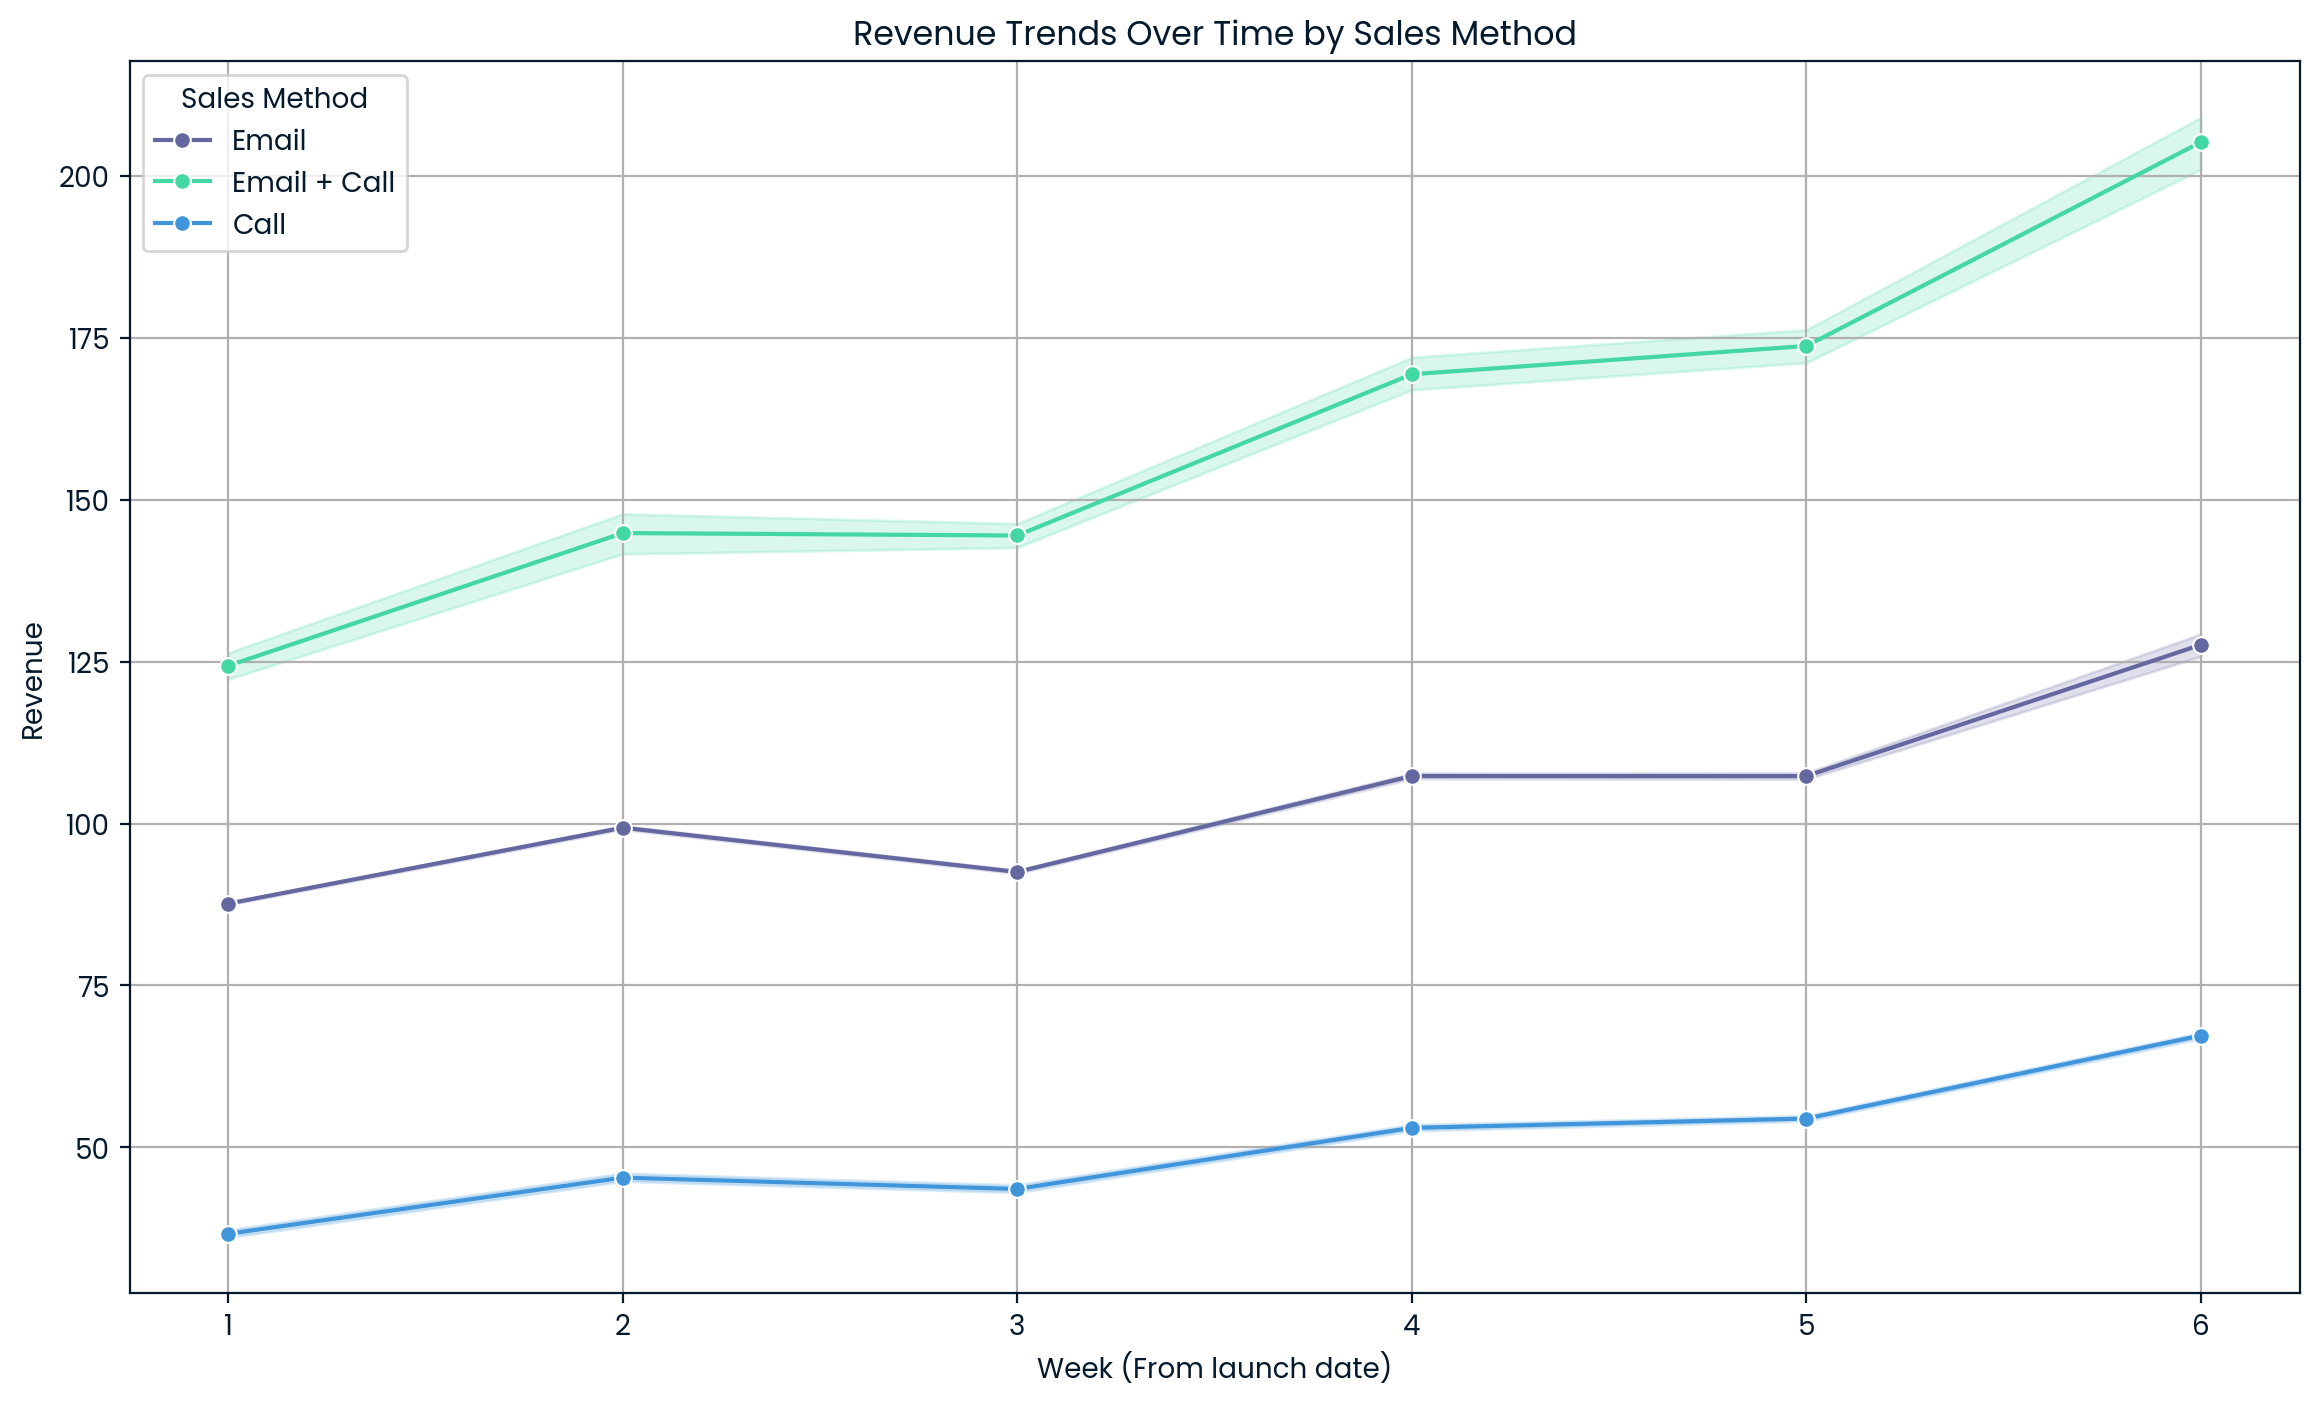

In [25]:
plt.figure(figsize=(14, 8))

# Plot revenue trends over time for each sales method
sns.lineplot(x='week', y='revenue', hue='sales_method', data=data, marker='o')

# Set plot labels and title
plt.xlabel('Week (From launch date)')
plt.ylabel('Revenue')
plt.title('Revenue Trends Over Time by Sales Method')

# Display the plot
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()

To better understand the differences between customers in each sales method group, it's valuable to analyze various attributes beyond revenue, such as the number of products sold, the number of years as a customer, and the number of site visits. This comprehensive analysis can provide insights into customer behavior, preferences, and how different sales methods impact these factors

In [26]:
# Descriptive Statistics for Each Group
group_stats = data.groupby('sales_method').agg({
    'nb_sold': ['mean', 'std', 'median'],
    'years_as_customer': ['mean', 'std', 'median'],
    'nb_site_visits': ['mean', 'std', 'median']
}).round(1)

print("Descriptive Statistics by Sales Method:")
print(group_stats)

Descriptive Statistics by Sales Method:
             nb_sold              ... nb_site_visits            
                mean  std median  ...           mean  std median
sales_method                      ...                           
Call             9.5  1.7   10.0  ...           24.4  3.6   24.0
Email            9.7  1.2   10.0  ...           24.8  3.3   25.0
Email + Call    12.2  1.9   12.0  ...           26.8  3.4   27.0

[3 rows x 9 columns]


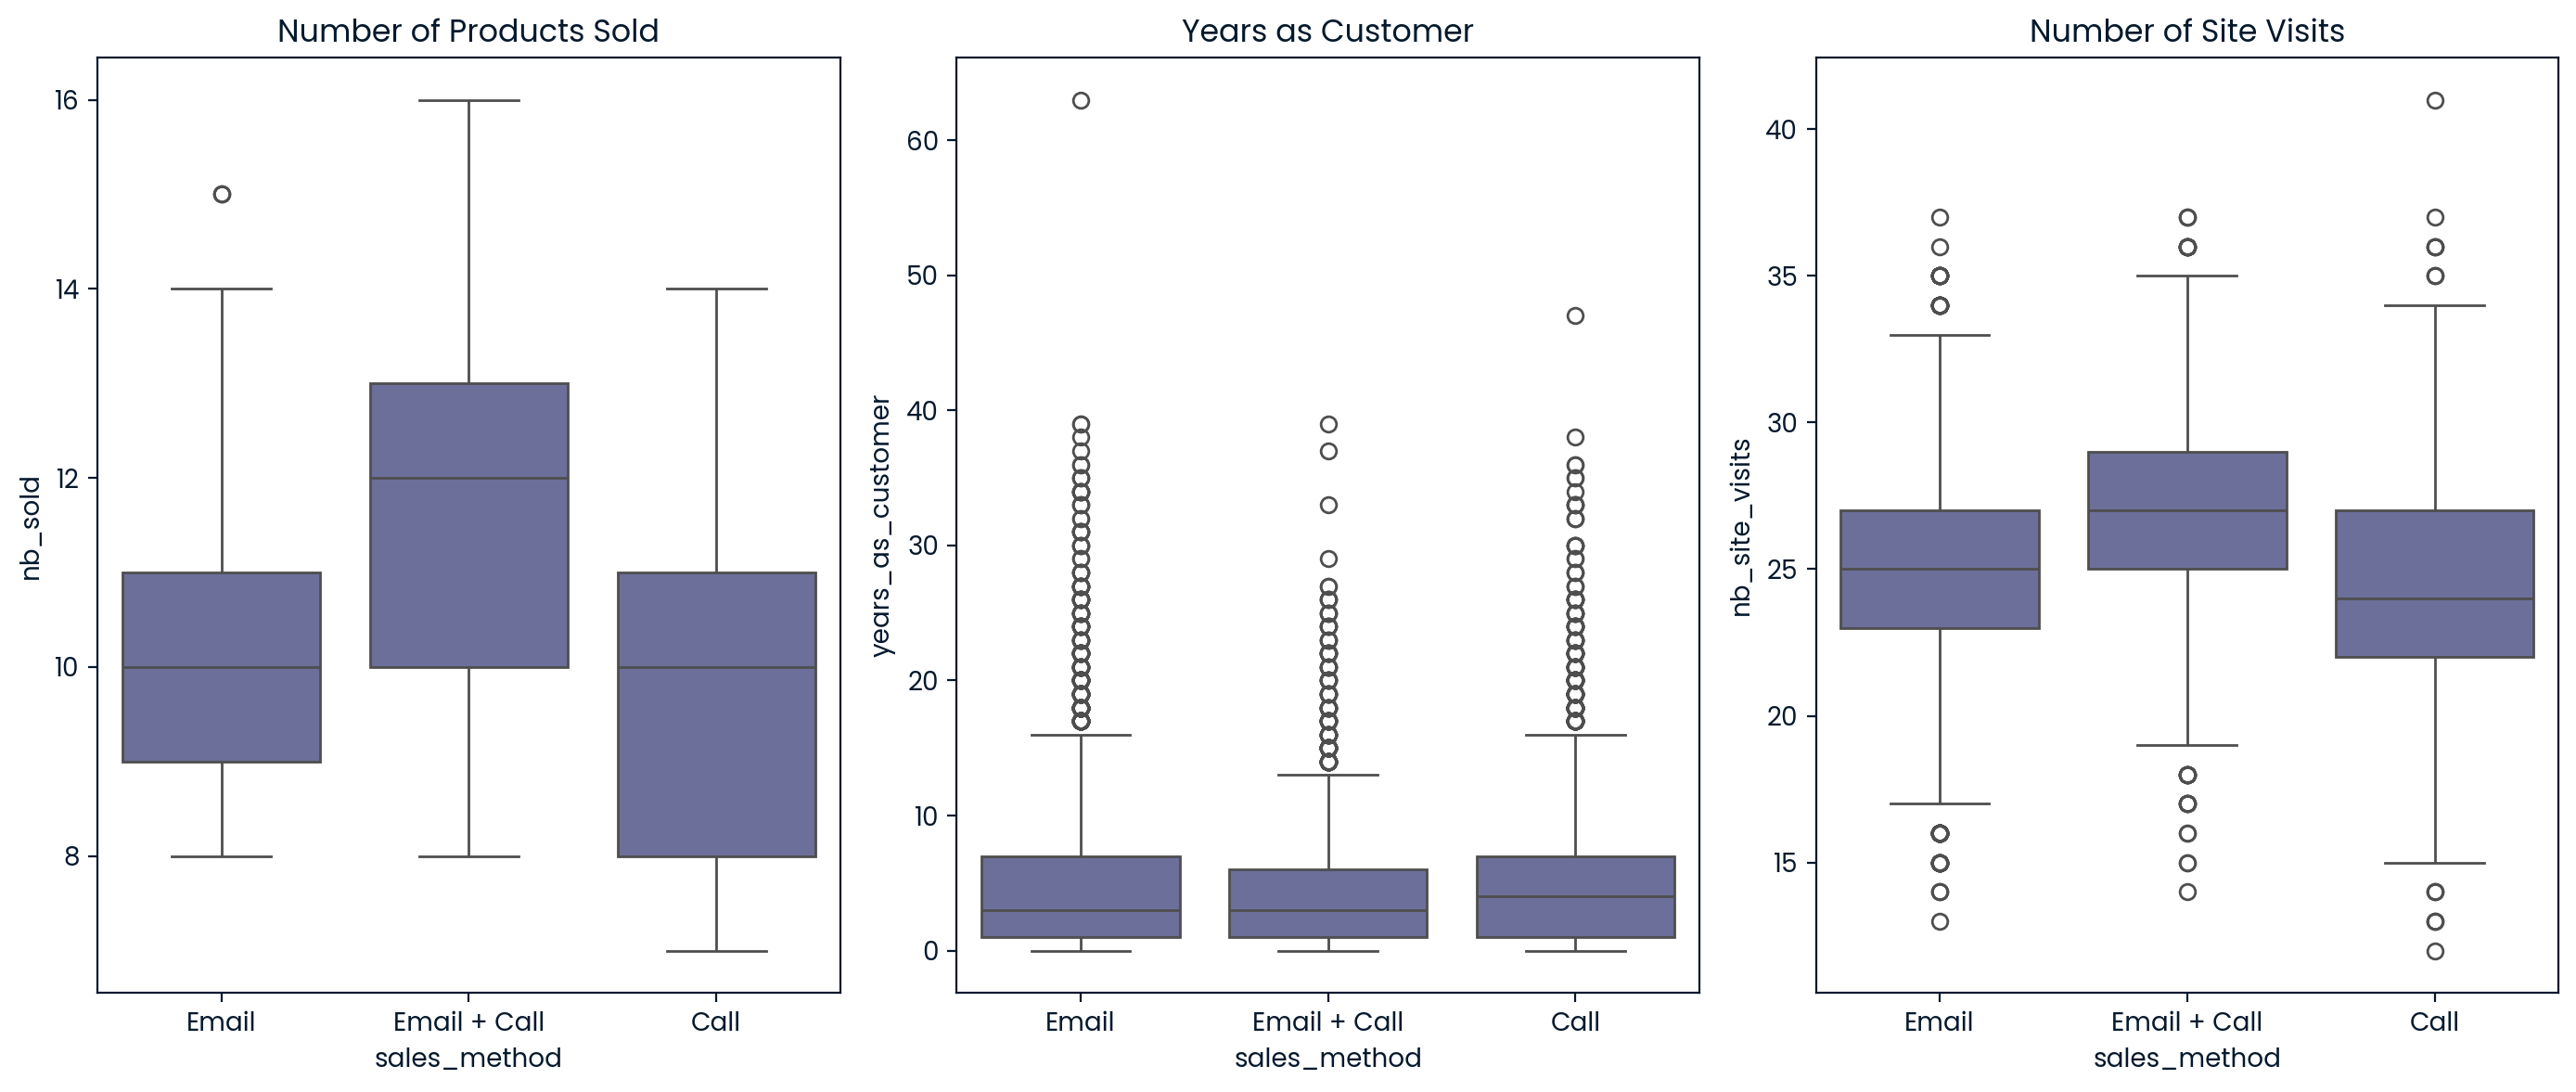

In [27]:
# Visual Analysis: Box Plots for Various Metrics

# Number of Products Sold
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='sales_method', y='nb_sold', data=data)
plt.title('Number of Products Sold')

# Years as Customer
plt.subplot(1, 3, 2)
sns.boxplot(x='sales_method', y='years_as_customer', data=data)
plt.title('Years as Customer')

# Number of Site Visits
plt.subplot(1, 3, 3)
sns.boxplot(x='sales_method', y='nb_site_visits', data=data)
plt.title('Number of Site Visits')

plt.tight_layout()
plt.show()

Furthermore, we can deduct from the data that the Email + Call sales method recorded the most numbers of products sold  and most number of site visits with mean at 12 products and and 27 visits respectively. 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation